In [35]:
#Vizualize dataset of body metrics collected by giving people a fitness tracking device.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,7,carlitos,1323084232,368296,05/12/2011 11:23,no,12,1.42,8.09,-94.4,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,8,carlitos,1323084232,440390,05/12/2011 11:23,no,12,1.42,8.13,-94.4,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,9,carlitos,1323084232,484323,05/12/2011 11:23,no,12,1.43,8.16,-94.4,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,10,carlitos,1323084232,484434,05/12/2011 11:23,no,12,1.45,8.17,-94.4,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [4]:
#store the first column
rows_num = df.shape[0]

In [5]:
print(rows_num)

19622


In [6]:
# is_null - empty col in dataset
total_nan = df.isnull().sum()

In [7]:
total_nan

Unnamed: 0                     0
user_name                      0
raw_timestamp_part_1           0
raw_timestamp_part_2           0
cvtd_timestamp                 0
new_window                     0
num_window                     0
roll_belt                      0
pitch_belt                     0
yaw_belt                       0
total_accel_belt               0
kurtosis_roll_belt         19216
kurtosis_picth_belt        19216
kurtosis_yaw_belt          19216
skewness_roll_belt         19216
skewness_roll_belt.1       19216
skewness_yaw_belt          19216
max_roll_belt              19216
max_picth_belt             19216
max_yaw_belt               19216
min_roll_belt              19216
min_pitch_belt             19216
min_yaw_belt               19216
amplitude_roll_belt        19216
amplitude_pitch_belt       19216
amplitude_yaw_belt         19216
var_total_accel_belt       19216
avg_roll_belt              19216
stddev_roll_belt           19216
var_roll_belt              19216
          

In [8]:
# count non empty variables in dataset using previous variable
without_nan = total_nan[total_nan==0]

In [9]:
without_nan

Unnamed: 0              0
user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
new_window              0
num_window              0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbe

In [10]:
#remove col with missing data
df = df[without_nan.keys()]

In [11]:
df

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,6,carlitos,1323084232,304277,05/12/2011 11:23,no,12,1.45,8.06,-94.4,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,7,carlitos,1323084232,368296,05/12/2011 11:23,no,12,1.42,8.09,-94.4,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,8,carlitos,1323084232,440390,05/12/2011 11:23,no,12,1.42,8.13,-94.4,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,9,carlitos,1323084232,484323,05/12/2011 11:23,no,12,1.43,8.16,-94.4,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,10,carlitos,1323084232,484434,05/12/2011 11:23,no,12,1.45,8.17,-94.4,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [12]:
#remove first 7 colums with no different info
df = df.iloc[:, 7:]

In [13]:
df

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
5,1.45,8.06,-94.4,3,0.02,0.00,-0.02,-21,4,21,...,0.02,-0.02,-0.03,193,203,-215,-9,660.0,478.0,A
6,1.42,8.09,-94.4,3,0.02,0.00,-0.02,-22,3,21,...,0.02,0.00,-0.02,195,205,-215,-18,659.0,470.0,A
7,1.42,8.13,-94.4,3,0.02,0.00,-0.02,-22,4,21,...,0.02,-0.02,0.00,193,205,-213,-9,660.0,474.0,A
8,1.43,8.16,-94.4,3,0.02,0.00,-0.02,-20,2,24,...,0.03,0.00,-0.02,193,204,-214,-16,653.0,476.0,A
9,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,22,...,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0,A


In [14]:
# transform to set of vectors
x_features = df.iloc[:,:-1].values

In [15]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()

In [16]:
type(x_features)

numpy.ndarray

In [18]:
features_std = std_scalar.fit_transform(x_features)

In [19]:
y_output = df.iloc[:,-1].values

In [20]:
y_output

array(['A', 'A', 'A', ..., 'E', 'E', 'E'], dtype=object)

In [21]:
#Get unique labels
unique_labels = np.unique(y_output)

In [22]:
unique_labels

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [24]:
y_output=label_encoder.fit_transform(y_output)

In [25]:
y_output

array([0, 0, 0, ..., 4, 4, 4])

In [26]:
#split data into training and testing set
test_perc = 0.1

In [27]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_std, y_output, test_size = test_perc, random_state = 0)

/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
#Vizulization using t-distributed Stotastic Neighbor Embedding(t-SNE) vizualuzation

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

In [29]:
#scatter plot the points among 5 classes
markers = ('c1', 'c2', 'c3', 'c4', 'c5')
color_map = {0:'red', 1:'blue', 2:'green', 3:'orange', 4:'purple'}

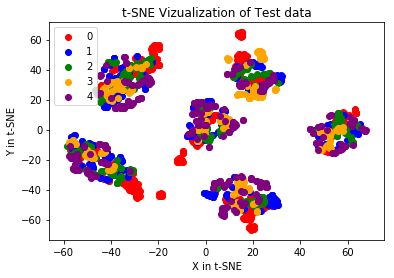

In [33]:
for index,color in enumerate(np.unique(y_test)):
    plt.scatter(x = x_test_2d[y_test == color,0], y = x_test_2d[y_test == color,1], c = color_map[index], label = color)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')

plt.legend(loc = 'upper left')

plt.title('t-SNE Vizualization of Test data')

plt.show()



In [34]:
plt.savefig('fig.png')

<Figure size 432x288 with 0 Axes>